# Plotting shapefiles with radar data

Author: [Irene Crisologo](philippineradarnetwork.wordpress.com)

This notebook shows how to plot shapefiles together with the radar data.


Import necessary modules.

In [2]:
%pylab inline
import numpy as np
import pylab as pl
import wradlib as wrl
import seaborn

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


Read the data.

In [3]:
data, attrs = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120806-131547-02-Z.nc')

Read the shapefile to be plotted. The shapefile used here has a WGS84 projection.

In [4]:
# Read shapefile for overlay
PATH_Ph_shapefile = '../phirad-data/shapefiles/Country/Country.shp'
dataset, inLayer = wrl.io.open_shape(PATH_Ph_shapefile)
borders, keys = wrl.georef.get_shape_coordinates(inLayer)

Get the site coordinates from the file attributes. The sitecoords must be in (longitude, latitude). By default, the pair is in the geographical coordinate system.

In [5]:
sitecoords = attrs['sitecoords'][0], attrs['sitecoords'][1]
print sitecoords

(121.022216796875, 14.142129898071289)


Set the projection with which the plot will be made. The projection should match the site coordinate, otherwise one has to be converted to match the other. Here the WGS84 (EPSG: 4326) is chosen for simplicity.

In [6]:
proj = wrl.georef.epsg_to_osr(4326)

Read the shapefile.

In [7]:
# Read shapefile for overlay
PATH_Ph_shapefile = '../phirad-data/shapefiles/Country/Country.shp'
dataset, inLayer = wrl.io.open_shape(PATH_Ph_shapefile)
borders, keys = wrl.georef.get_shape_coordinates(inLayer)

Plot.

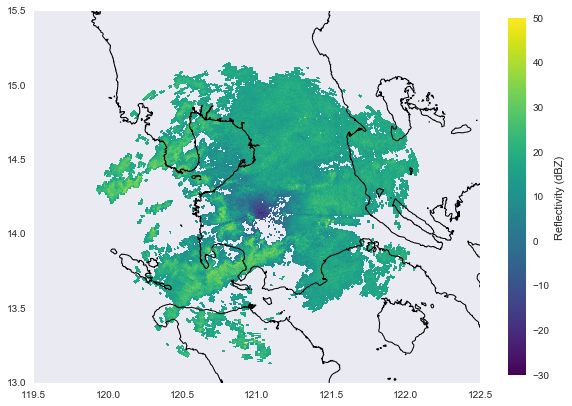

In [9]:
fig = pl.figure(figsize=(10, 8))
ax,pm = wrl.vis.plot_ppi(np.ma.masked_invalid(data), r=np.arange(500.,120000.,500.), 
                         az=np.arange(0,360), site=sitecoords, proj=proj, vmax=50, vmin=-30,
                         cmap=pl.cm.viridis)
wrl.vis.add_lines(ax, borders, color='black', lw=1.)
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('Reflectivity (dBZ)')